# El método de Euler aplicado a sistemas de EDOs

En este documento, por un lado se va a implementar el método de Euler, y por otro se aplicará dicho método para simular la evolución de dos sistemas de EDOs distintos.

<ul id="top">
<li><a href="#1-Lotka-Volterra-con-caza-periódica">1-Lotka-Volterra con caza periódica</a></li>
<li><a href="#2-Implementación-del-método-de-Euler">2-Implementación del método de Euler</a></li>
<li><a href="#3-Simulación-de-un-péndulo">3-Simulación de un péndulo</a></li>
<li><a href="#Valoración">Valoración</a></li>
</ul>  

In [1]:
using Plots
using DelimitedFiles

## 1-Lotka-Volterra con caza periódica
### Variante del sistema presa-depredador de Lotka-Volterra con caza periódica

Consideramos la siguiente variante no autónoma del sistema
   presa-depredador de Lotka-Volterra:

<a id='Edo-LV'></a>
\begin{equation*}
\frac{d}{dt} v = \left(a-b w - g(t) \right)\, v, \quad \frac{d}{dt}w = \left(c v-d\right)\, w. \hspace{3em} \tag{1}
\end{equation*}

El tiempo $t$ se mide en meses.
La variable de estado $v$ representa el número de alces de un parque
natural protegido, y $w$ el número de lobos. Los símbolos $a,b,c,d$ se refieren a parámetros constantes del problema, que en nuestro caso fijamos como $a=1$, $b=1/50$, $c=3/100$, $d=1$.
Se supone que los guardas
del parque cazan de forma periódica (con un periodo de doce meses)
cierto porcentaje de alces, porcentaje que varía 
dependiendo de los meses del año, 
donde $g(t)$ es una función períodica de $t$ con un período de 12 meses, que
representa la tasa de caza de alces por unidad de tiempo. Como ejemplo ilustrativo, aquí consideraremos la función 

\begin{equation}
  g(t)= \frac{1}{20} \big(\sin\big(\frac{\pi\, t}{12}\big)\big)^2.
\end{equation}

Dicha función alcanza su valor máximo (igual a $1/20$) a mitad de año, cuando $t=6$, y se anula al principio y final del año (es decir, $t=0$ y $t=12$). 

En las transparencias de la tercera parte del Tema 1 se muestra que el sistema (1) se puede escribir de forma compacta de la forma

<a id='Edo-Compacta'></a>
\begin{equation}
\frac{d}{dt} u = f(t,u,p). \hspace{7em} \tag{2}
\end{equation}


### 1.1- Ejercicio

- **Implementar la función $f$ que hace que el sistema  [(1)](#Edo-LV) sea equivalente a [(2)](#Edo-Compacta).**

In [65]:
function f(t,u,p)
    v=u[1]
    w=u[2]
    a = p[1]
    b = p[2]
    c = p[3]
    d = p[4]
    gt = 1/20*(sin((pi*t)/12))^2
    dv = (a-b*w-gt)*v
    dw = (c*v-d)*w
    return [dv, dw]
end

f (generic function with 1 method)

### 1.2- Ejercicio

- Consideremos la solución $u(t)=(v(t),w(t))$ de [(1)](#Edo-LV) con los datos iniciales $v(0)=51$, $w(0)=33$. **Calcular la aproximación $u_1=(v_1,w_1)$ de $u(t_1)=(v(t_1),w(t_1))$ en $t_1 = 0.025$ aplicando un paso de longitud $h=0.025$ del método de Euler.**

In [68]:
p = [1.,1/50,3/100,1.]
u0 = [51., 33.]
t0 = 0.
h = 0.025
t1 = t0+h
u1 = u0+h*f(t0,u0,p)

2-element Array{Float64,1}:
 51.4335 
 33.43725

> **Comprobación**
>
>El resultado debería coincidir con el mostrado en el documento 
 <a href="https://egela1819.ehu.eus/mod/resource/view.php?id=1022048">Ilustración del método de Euler para sistemas de EDOs </a> (disponible en el aula virtual).

### 1.3- Ejercicio

- **Hacer otro tanto para calcular la aproximación $u_2=(v_2,w_2)$ de $u(t_2)=(v(t_2),w(t_2))$ en $t_2=2h$ (para $h=0.025$) obtenida por el método de Euler a partir de la aproximación $u_1=(v_1,w_1)$ de $u(t_1)=(v(t_1),w(t_1))$ previamente calculada.**

In [4]:
t2 = t1+h
u2 = u1+h*f(t1,u1,p)

2-element Array{Float64,1}:
 51.85943734704205
 33.89116484840625

In [5]:
t3 = t2+h
u3 = u2+h*f(t2,u2,p)
print(u3,"\n")
t4 = t3+h
u4 = u3+h*f(t3,u3,p)
print(u4)

[52.2771, 34.3621]
[52.6859, 34.8503]

In [6]:
tF = 30
h = 0.025
tt = 0:h:tF

print(length(tt))

1201

In [7]:
u = zeros(length(tt),2)

u[1,:] = [51.,33.]# u0
tt[1]#t0

for k in 2:length(tt)
    u[k,:] = u[k-1,:]+h*f(tt[k-1],u[k-1,:],p)
end
u

1201×2 Array{Float64,2}:
 51.0     33.0   
 51.4335  33.4372
 51.8594  33.8912
 52.2771  34.3621
 52.6859  34.8503
 53.0849  35.3561
 53.4735  35.8799
 53.8509  36.4218
 54.2164  36.9823
 54.5691  37.5615
 54.9082  38.1598
 55.233   38.7772
 55.5426  39.4141
  ⋮              
 12.8294  60.4605
 12.7464  59.5308
 12.6698  58.6116
 12.5994  57.7033
 12.5352  56.806 
 12.4769  55.9199
 12.4244  55.0452
 12.3775  54.182 
 12.3362  53.3304
 12.3002  52.4905
 12.2696  51.6625
 12.244   50.8464

In [8]:
g(t) = 1/20*(sin(pi*t/12))^2

c = zeros(length(tt),1)
for k in 1:length(tt)
    c[k] = g(tt[k])
end

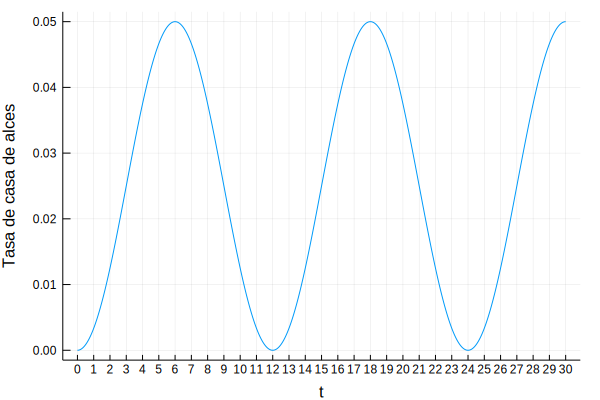

In [9]:
xt = 0.0:1.0:30.0
plot(tt,c,xticks=xt,xlabel="t",ylabel="Tasa de casa de alces",label="")

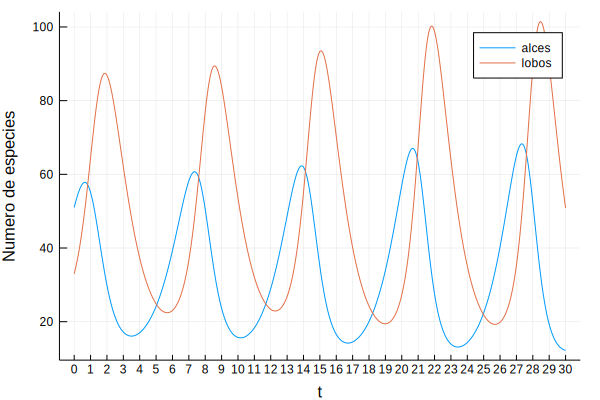

In [10]:
plot(tt,u[:,1],xticks=xt,xlabel="t",ylabel="Numero de especies",label="alces")
plot!(tt,u[:,2],label="lobos")

<a href="#top">Back to the top</a>

## 2-Implementación del método de Euler

Queremos simular numéricamente la evolución de sistemas modelados por 
ecuaciones diferenciales ordinarias (EDOs) de dimensión $d\geq 1$ de la forma [(2)](#Edo-Compacta)
donde $u =(u^1,\ldots,u^d) \in \mathbb{R}^d$ es el _vector de estado_ del sistema, y $p \in \mathbb{R}^m$ es un vector de parámetros constantes del sistema.

Sabemos que, fijado el vector $p$ de parámetros constantes, 
dados $t_0 \in \mathbb{R}$ y $u_0 =(u^1_0,\ldots,u^d_0) \in \mathbb{R}^d$, existe una única solución $u(t)$ de [(2)](#Edo-Compacta) que satisfaga la condición inicial

<a id='Cond-Ini'></a>
\begin{equation}
  u(t_0)=u_0. \hspace{8em} \tag{3}
\end{equation}

En la práctica, nos interesará calcular de forma aproximada la solución $u(t)$ para un cierto intervalo temporal $t \in [t_0,T]$. Se aproximará dicha solución en una discretización del tiempo obtenida de dividir el intervalo temporal $[t_0,T]$ en $n$ partes iguales. Es decir,  se tomará los valores discretos del tiempo $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$, donde $t_k=t_{0}+k h$, con $h=(T-t_0)/n$, y se calcularán las aproximaciones 
$u_k =(u^1_k,\ldots,u^d_k) \approx u(t_k)$ para $k=0,1,\ldots,n$.

### 2.1 - Ejercicio

- **Para realizar los ejercicios de simulación que siguen, se debe primeramente implementar en Julia el método de Euler. Se definirá una función (que llamaremos Euler) que toma como argumentos de entrada $u0, t0, T, n, f, p$.**
     - El argumento de entrada $f$ es el nombre de una función previamente definida, tal que dados $t \in \mathbb{R}$, un vector $u \in \mathbb{R}^d$, y un vector de parámetros $p\in \mathbb{R}^m$, devuelve un vector $f(t,u,p) \in \mathbb{R}^d$. Dicha función determina un sistema de EDOs de la forma (2).
     - El significado del resto de los argumentos de entrada de dicha función se puede deducir de las consideraciones de arriba. 
     - La función Euler debe devolver como argumento de salida una matriz $W \in \mathbb{R}^{(n+1) \times (d+1)}$
 \begin{eqnarray*}
W = \left(
     \begin{array}{cccc}
t_0    &   u^1_0 & \cdots& u^d_0  \\
t_1    &    u^1_1 & \cdots& u^d_1  \\
\vdots &  \vdots & \ddots& \vdots \\
t_{n}  &      u^1_n & \cdots& u^d_n
     \end{array}
\right),
\end{eqnarray*} 
donde $t_k = t_0 + k \, (T-t_0)/n$, y los vectores $u_k  = (u^1_k,\ldots,u^d_k) \in \mathbb{R}^d$ ($k=1\ldots,n$) son aproximaciones de $u(t_k)$ que se han obtenido aplicando el método de Euler al sistema [(2)](#Edo-Compacta) con la condición inicial [(3)](#Cond-Ini) utilizando una longitud de paso  $h=(T-t_0)/n$.

In [11]:
function f(t,u,p)
    v=u[1]
    w=u[2]
    a = p[1]
    b = p[2]
    c = p[3]
    d = p[4]
    gt = 1/20*(sin((pi*t)/12))^2
    dv = (a-b*w-gt)*v
    dw = (c*v-d)*w
    return [dv, dw]
end

f (generic function with 1 method)

In [12]:
function  Euler(u0, t0, T, n, f, p)
    h = (T-t0)/n   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        duj = f(tj,uj,p)
        uj = uj+h*duj
        tj = tj+h
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

Euler (generic function with 1 method)

### 2.2 - Ejercicio

Una vez implementada la función Euler,
 - **Resolver numéricamente (con el método de Euler) el sistema con valores iniciales $v(0)=51$, $w(0)=33$, para $t\in[0,30]$. Para ello, considerar $n=1200$, y por tanto $h=30/1200=0.025$.**

In [13]:
u0= [51.,33.]
t0=0
T=30
n = 1200
p = [1.,1/50,3/100,1.]

res = Euler(u0,t0,T,n,f,p)

1201×3 Array{Float64,2}:
  0.0    51.0     33.0   
  0.025  51.4335  33.4372
  0.05   51.8594  33.8912
  0.075  52.2771  34.3621
  0.1    52.6859  34.8503
  0.125  53.0849  35.3561
  0.15   53.4735  35.8799
  0.175  53.8509  36.4218
  0.2    54.2164  36.9823
  0.225  54.5691  37.5615
  0.25   54.9082  38.1598
  0.275  55.233   38.7772
  0.3    55.5426  39.4141
  ⋮                      
 29.725  12.8294  60.4605
 29.75   12.7464  59.5308
 29.775  12.6698  58.6116
 29.8    12.5994  57.7033
 29.825  12.5352  56.806 
 29.85   12.4769  55.9199
 29.875  12.4244  55.0452
 29.9    12.3775  54.182 
 29.925  12.3362  53.3304
 29.95   12.3002  52.4905
 29.975  12.2696  51.6625
 30.0    12.244   50.8464

> **Comprobación**
>
>Los resultados en los primeros tiempos deberían coincidir con los mostrados en el documento 
 <a href="https://egela1819.ehu.eus/mod/resource/view.php?id=1022048">Ilustración del método de Euler para sistemas de EDOs </a> (disponible en el aula virtual). 

 - **Obtener una figura con las gráficas de ambas componentes de la solución con respecto del tiempo.**

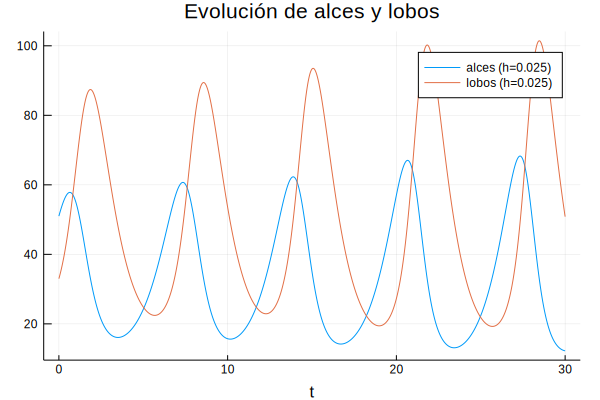

In [14]:
tt = res[:,1]  #Se extrae la primera columna de la tabla res
vv = res[:,2]  #Segunda columna de la tabla de resultados res
ww = res[:,3]  #Tercera columna de la tabla res

plot(tt,[vv, ww],title="Evolución de alces y lobos",
      xlabel="t",label=["alces (h=0.025)" "lobos (h=0.025)"])

### 2.3- Ejercicio

Una opción para comprobar si los resultados de la evolución de las poblaciones de las dos especies son fiables (en el sentido de que dan aproximaciones fiables de la solución de nuestro modelo matemático), consiste en volver a aplicar el método de Euler, pero con una longitud de paso $h$ más pequeña que la utilizada arriba ($h=30/1200=0.025$). Por ejemplo, con $h= 0.025/2 = 0.0125$.  Eso se podría hacer fácilmente con la función Euler implementada en el Ejercicio 2.1, llamando a la función con $n=2400$ en lugar de con $n=1200$, pero en dicho caso, la tabla de resultados será mayor, pues se guardarán los resultados calculados para una discretización más fina.

En lugar de ello, implementaremos una nueva versión de la función Euler, que toma un argumento de entrada $m$ adicional (que debe ser un número entero positivo). 

- En caso de que se le llame a la nueva función Euler con $m=1$, procederá de la misma forma que la función Euler implementada en el ejercidio 2.1, obteniendo aproximaciones $u_k \approx u(t_k)$ ($k=1,2,\ldots,n$)  para $t_k = t_0 + k \, (T-t_0)/n$, aplicando el método de Euler al sistema [(2)](#Edo-Compacta) con la condición inicial [(3)](#Cond-Ini).  

- En caso de que $m>1$, se obtienen aproximaciones $u_k\approx u(t_k)$ para los mismos tiempos $t_k$, calculando $u_k$ como resultado de la aplicación de $m$ pasos de longitud $h= (T-t0)/(n\, m)$ del método de Euler a partir de $u_{k-1}$. 

- El argumento de entrada $m$ será opcional, con valor por defecto $m=1$. (Es decir, si no se suministra dicho argumento de entrada, se considera que $m=1$.)

- **Implementar dicha nueva versión de la función Euler**

In [15]:
function  Euler(u0, t0, T, n, f, p, m=1)
    h = (T-t0)/(m*n);   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
      for i in 1:m  
        duj = f(tj,uj,p)
        uj = uj+h*duj
        tj = tj+h
      end      
        W[j+1,:] = [tj; uj]   # Se introduce el resultado del paso j-ésimo 
                        # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

Euler (generic function with 2 methods)


 - **Resolver numéricamente (con el método de Euler) el sistema con valores iniciales $v(0)=51$, $w(0)=33$, para $t\in[0,30]$, obteniendo aproximaciones $(v_k, w_k) \approx (v(t_k), w(t_k))$ ($k=1,2,\ldots,n$)  para $t_k = t_0 + k \, (T-t_0)/n$ con $n=1200$, pero a diferencia de en el Ejercicio 2.2, esta vez utilizando como longitud de paso $h=30/2400=0.0125$.**

In [16]:
u0 = [51.,33.]
t0=0
T = 30
n = 1200
res2 = Euler(u0,t0,T,n,f,p,2)

1201×3 Array{Float64,2}:
  0.0    51.0     33.0   
  0.025  51.4316  33.4414
  0.05   51.8554  33.8996
  0.075  52.2706  34.3748
  0.1    52.6765  34.8674
  0.125  53.0725  35.3777
  0.15   53.4576  35.906 
  0.175  53.8313  36.4525
  0.2    54.1926  37.0176
  0.225  54.5408  37.6014
  0.25   54.8751  38.2042
  0.275  55.1947  38.8263
  0.3    55.4987  39.4678
  ⋮                      
 29.725  14.9052  52.8062
 29.75   14.8671  52.0784
 29.775  14.8345  51.3593
 29.8    14.8073  50.649 
 29.825  14.7853  49.9475
 29.85   14.7686  49.2549
 29.875  14.7569  48.5714
 29.9    14.7502  47.8969
 29.925  14.7486  47.2317
 29.95   14.7518  46.5756
 29.975  14.7598  45.9289
 30.0    14.7726  45.2914

 - **Añadir a la figura obtenida en el Ejercicio 2.2,  las gráficas de ambas componentes de la solución con respecto del tiempo correspondientes a los resultados obtenidos con $h=0.0125$.**

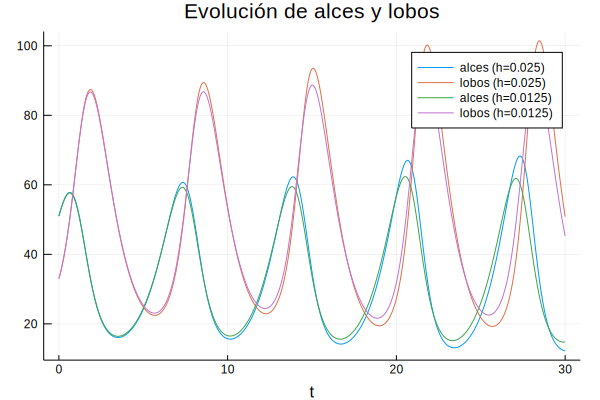

In [17]:
tt = res[:,1]  #Se extrae la primera columna de la tabla res
vv = res[:,2]  #Segunda columna de la tabla de resultados res
ww = res[:,3]  #Tercera columna de la tabla res

plot(tt,[vv, ww],title="Evolución de alces y lobos",
      xlabel="t",label=["alces (h=0.025)" "lobos (h=0.025)"])

tt2 = res2[:,1]
vv2 = res2[:,2]
ww2 = res2[:,3]

plot!(tt2,[vv2, ww2],title="Evolución de alces y lobos",
      xlabel="t",label=["alces (h=0.0125)" "lobos (h=0.0125)"])

 - **¿Cual de los resultados es de esperar que sea más precisos, los obtenidos con $h=0.0125$ o los obtenidos con $h=0.025$?**

> **Respuesta**
>
>Sabemos que u$k$ se aceraca mas a u($tk$) cuando los pasos h estan mas pequeños, porque el error del metodo de Euler es proporcional al tamaño de los pasos. Por lo cual los resultados obtenidos con h=0.0125 son mas precisos que los resultados obtenidos con h=0.025.

 - **Al comparar los resultados obtenidos con $h=0.0125$ con los obtenidos con $h=0.025$, ¿se puede concluir que los resultados obtenidos con $h=0.025$ son muy precisos?.**
 
> **Respuesta**
>
> Se puede ver que los resultados obtenidos con $h=0.025$ y con $h=0.0125$ son muy parecidos al inicio, pero que aparece una divergencia entre los resultados para todos los tiempos $t > 10$. Ademas esta divergenica va creciendo en amplitud en el tiempo para todo los tiempos t > 10. Por eso no se puede concluir que los resultados obtenidos con $h=0.025$ son muy precisos. De hecho, como el error disminue para pasos de tamaño mas pequeños, se puede conlcuir que los resultados obtenidos con $h=0.025$ son menos precisos que los resultados obtenidos con $h=0.0125$.

<a href="#top">Back to the top</a>

## 3-Simulación de un péndulo
**Simulación de un péndulo bajo el efecto de la gravedad y la resistencia del aire**

Consideraremos la siguiente EDO de segundo orden, que modela el
  movimiento de un pendulo formado por una esfera de superficie suave unida al eje de giro por una varilla. Se supone que el péndulo está inmerso en aire, y se tiene en cuenta el efecto sobre la esfera de la acceleración de la gravedad, la resistencia del aire al movimiento de la esfera, pero no sobre la varilla, que se considera de masa y diametro de sección transversal despreciable (con respecto a la masa y el radio de la esfera respectivamente).  
  
  En dicho modelo, $\theta(t)$ es el ángulo (con respecto a la posición vertical) de la varilla en el instante $t$,
$L$ es la distancia del eje de giro al centro de la esfera, $g$ es la acceleración de la
gravedad, $R$ es el radio de la esfera, $\rho_e$ es la densidad de la esfera, $\rho_a$ es la densidad del aire, y $\mu_a$ es la densidad dinámica del aire. La ecuación diferencial (de segundo orden) que se obtiene es

<a id='Edo-Pendulo'></a>
\begin{equation*}
        \frac{d^2 \theta}{dt^2} = -\frac{g}{L}\, \sin(\theta) - \sigma\, \frac{3 \rho_a\, L\, C_D(Re)}{8\, \rho_e \, R}\, \left|\frac{d\theta}{dt}\right|^2, \tag{4}
\end{equation*}
    
donde  $\sigma=1$ si $\frac{d\theta}{dt}>0$, y $\sigma=-1$ en caso contrario, y
\begin{equation*}
        Re = \frac{2\, \rho_a\, R\, L}{\mu_a} \left| \frac{d \theta}{dt}\right|, \quad
        C_D(Re)  = \left\{
        \begin{matrix}
       \frac{24}{Re} + \frac{2}{5} +\frac{6}{1+\sqrt{Re}} & \mbox{ si} & Re>0,\\
       0  \phantom{ \frac{2}{5} +\frac{6}{1+\sqrt{Re}} }  & \mbox{ si} & Re=0.
        \end{matrix}
        \right. 
\end{equation*}

Aquí, $C_D(Re)$ es el _coeficiente de arrastre_ de un fluido cualquiera sobre una esfera de superficie suave (ya considerado anteriormente, que es función del _número de Reynols_ $Re$, directamente proporcional a la velocidad $|v|=L\, |d\theta/dt|$ de la esfera).

Consideraremos los siguientes valores de los parámetros del problema, correspondientes al caso de un péndulo de 20cm de longitud con una esfera de aluminio de 2cm de radio, inmersa en  aire (a $20^oC$  con una presión estándar de una atmósmera):   


<a id='Inicial-cond'></a>
\begin{equation}
L=0.2\, \mathrm{m}, \ 
R=0.02\, \mathrm{m}, \  
\rho_e=2712\, \mathrm{Kg}/\mathrm{m^3}, \ 
\rho_a = 1.205\,  kg/m^3, \ 
\mu_a = 1.789\times 10^{-5}\,  kg/(\mathrm{m} \,\mathrm{seg}), \ 
g=9.8\, \mathrm{m}/\mathrm{seg}^2. \tag{5}
\end{equation}

Queremos simular la evolución del ángulo $\theta(t)$ con respecto del tiempo, para $t \in [0,50]$.  En particular, consideraremos el caso en que inicialmente se deja la varilla inmóvil en posición casi vertical
 \begin{equation*}
   \theta(0)=\pi-0.001, \quad \frac{d\theta}{dt}(0)=0.
 \end{equation*}

### 3.1- Ejercicio

- **Reescribir la ecuación de segundo órden [(4)](#Edo-Pendulo) como un sistema de dos ecuaciones de primer orden, añadiendo para ello una nueva variable $\omega$ para la velocidad angular $\frac{d\theta}{dt}$, de tal modo que el vector de estados en este sistema es $u = (\theta, \omega)$. Implementar la función $f$ que hace que dicho sistema de dos ecuaciones de primer orden sea equivalente a [(2)](#Edo-Compacta).**

**Ecuacion de segundo orden** (4)
\begin{equation*}
        \frac{d^2 \theta}{dt^2} = -\frac{g}{L}\, \sin(\theta) - \sigma\, \frac{3 \rho_a\, L\, C_D(Re)}{8\, \rho_e \, R}\, \left|\frac{d\theta}{dt}\right|^2, \tag{4}
\end{equation*}

**Sistema de dos ecuaciones de primer orden**
\begin{equation*}
        \frac{d \theta}{dt} = \omega, \frac{d \omega}{dt} = -\frac{g}{L}\, \sin(\theta) - \sigma\, \frac{3 \rho_a\, L\, C_D(Re)}{8\, \rho_e \, R}\, \left|\omega\right|^2
\end{equation*}

In [52]:
function f(t,u,p)
    L = p[1]
    g = p[2]
    rhoe = p[3]
    R = p[4]
    rhoa = p[5]
    mu = p[6]
    theta = u[1]
    omega = u[2]
    if omega==0 
        Cd = 0
    else
        Re = (2*rhoa*R*L)/mu*abs(omega)
        if Re ==0
            Cd = 0
        else
            Cd = 24/Re+2/5+6/(1+sqrt(Re))
        end
    end
    dtheta = omega
    
    if omega > 0
        sigma=1
    else
        sigma=-1
    end  
    aux =sigma*(3*rhoa*L*Cd)/(8*rhoe*R)*(omega^2)
    
    domega = -(g*sin(theta))/L-aux

    return [dtheta,domega] 
end 

f (generic function with 1 method)

- **Evaluar la función f recién implementada para los valores de los parámetros constantes dados 
en [(5)](#Inicial-cond) para $t=0$, $\theta=\pi/2$, $\omega=0.1$.**

In [53]:
 L = 0.2
 gf = 9.8
 rhoe = 2712  # Densidad del aluminio
 R = 0.02
 rhoa = 1.205 # densidad del aire a 20ºC al nivel del mar
 mu = 1.789*1e-5 # viscosidad dinámica del aire a 20ºC al nivel del mar
 p = [L, gf, rhoe, R, rhoa, mu]
 u0 = [pi/2,0.1]
 t0 = 0
 f(t0, u0, p)

2-element Array{Float64,1}:
   0.1             
 -49.00002607219265

> **Comprobación**
>
> Debería de dar como resultado el vector [0.1, -49.00002607219265]. 

### 3.2- Ejercicio

- **Aproximar la solucion $\theta(t)$ para $t=t_0,t_1,t_2,\ldots,t_n=50$, donde $t_k=50 \, k/n$, $n=24000$, utilizando el método de Euler con longitud de paso $h=50/n=1/480$.**

In [54]:
function  Euler(u0, t0, T, n, f, p, m=1)
    h = 50/(m*n);   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
    d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
    W = zeros(n+1,d+1)
    W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
    tj = t0
    uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
      for i in 1:m  
        duj = f(tj,uj,p)
        uj = uj+h*duj
        tj = 50*j/n
      end      
      W[j+1,:] = [tj; uj]   # Se introduce el resultado del paso j-ésimo 
                        # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

Euler (generic function with 2 methods)

In [55]:
  t0 = 0.
  T = 50.
  u0 = [pi/2,0.1]
  n = 24000
  res = Euler(u0,t0,T,n,f,p)

24001×3 Array{Float64,2}:
  0.0           1.5708    0.1       
  0.00208333    1.571    -0.00208339
  0.00416667    1.571    -0.104167  
  0.00625       1.57078  -0.20625   
  0.00833333    1.57035  -0.308333  
  0.0104167     1.56971  -0.410416  
  0.0125        1.56886  -0.512499  
  0.0145833     1.56779  -0.614581  
  0.0166667     1.56651  -0.716663  
  0.01875       1.56502  -0.818744  
  0.0208333     1.56331  -0.920824  
  0.0229167     1.56139  -1.0229    
  0.025         1.55926  -1.12498   
  ⋮                                 
 49.9771      317.794     9.14294   
 49.9792      317.813     9.19114   
 49.9813      317.832     9.24105   
 49.9833      317.852     9.29265   
 49.9854      317.871     9.34593   
 49.9875      317.891     9.40088   
 49.9896      317.91      9.4575    
 49.9917      317.93      9.51576   
 49.9937      317.95      9.57566   
 49.9958      317.97      9.63719   
 49.9979      317.99      9.70032   
 50.0         318.01      9.76504   

- **Representar gráficamente la evolución de $\theta(t)$ con respecto del tiempo.**

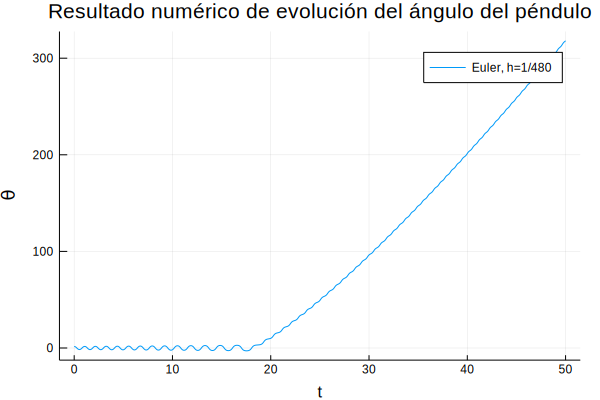

In [56]:
  tt = res[:,1]
  thetas = res[:,2]
  omegas = res[:,3]
  plot(tt,thetas,title="Resultado numérico de evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label="Euler, h=1/480")

### 3.3- Ejercicio

- **Guardar la secuencia de valores de los ángulos obtenidos en un fichero, y probar a utilizarlo para realizar una animación del movimiento del péndulo. Interpretar los resultados para concluir si la simulación del movimiento del péndulo tiene sentido desde el punto de vista físico.**

In [57]:
data="./angulos_pendulo.txt"
f1=open(data,"w")
writedlm(f1,thetas)
close(f1)

- **Realizar una animación del movimiento del péndulo ejecutando el codigo JavaScripts: <a href="http://www.ehu.eus/ccwmuura/irakaskuntza/sinum/animaciones/pendulo/pendulo_desde_fichero.html">Fichero html</a>, especificando el nombre del archivo en el que han guardado la secuencia de valores de los ángulos.**

- **¿Parece un movimiento realista?**

> **Respuesta**
>
>El movimiento que aparece no parece muy realista, dado que el movimiento del pendulum va creciendo en amplitud y que desde el inicio la amplitud del movimiento sobre-pasa el nivel de lanzamiento, lo que no deberia pasar si el pendulum fue equilibrado correctamente. Ademas, parece que el moviemento sale del equilibro, y entra en un estado poco probable en cual empieza a girar 360 grados con una velocidad que va creciendo.

### 3.4- Ejercicio

- **Volver a aplicar el método de Euler para obtener aproximaciones de la solución para $t=t_0,t_1,t_2,\ldots,t_{24000}$, donde $t_k=\frac{50 \, k}{24000}$, pero esta vez con longitud de paso $h=1/960$.**

In [58]:
 res2 = Euler(u0,t0,T,n,f,p,2)

24001×3 Array{Float64,2}:
  0.0           1.5708     0.1       
  0.00208333    1.57095   -0.00208337
  0.00416667    1.57089   -0.104167  
  0.00625       1.57062   -0.20625   
  0.00833333    1.57014   -0.308333  
  0.0104167     1.56945   -0.410416  
  0.0125        1.56854   -0.512499  
  0.0145833     1.56742   -0.614581  
  0.0166667     1.56608   -0.716662  
  0.01875       1.56454   -0.818743  
  0.0208333     1.56278   -0.920822  
  0.0229167     1.56081   -1.0229    
  0.025         1.55862   -1.12497   
  ⋮                                  
 49.9771      -19.7477   -12.7393    
 49.9792      -19.7742   -12.6588    
 49.9813      -19.8006   -12.5766    
 49.9833      -19.8267   -12.4929    
 49.9854      -19.8527   -12.4076    
 49.9875      -19.8785   -12.3209    
 49.9896      -19.9041   -12.2329    
 49.9917      -19.9296   -12.1435    
 49.9937      -19.9548   -12.053     
 49.9958      -19.9799   -11.9612    
 49.9979      -20.0048   -11.8684    
 50.0         -20.0294  

 - **Representar en una misma figura la evolución del ángulo del péndulo correspondiente a la aplicación de Euler con $h=1/480$ y con $h=1/960$ respectivamente.**

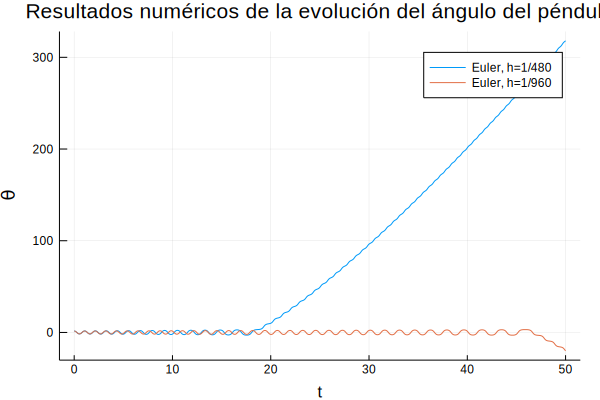

In [59]:
tt2 = res2[:,1]
thetas2 = res2[:,2]
omegas2 = res2[:,3]
plot(tt,thetas,title="Resultados numéricos de la evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label="Euler, h=1/480")
plot!(tt2,thetas2, label="Euler, h=1/960")

In [60]:
data="./angulos_pendulo2.txt"
f1=open(data,"w")
writedlm(f1,thetas2)
close(f1)

### 3.5- Ejercicio

- **¿Son consistentes los resultados (es decir, son tan parecidas que no se distinguen a simple vista)?** 

> **Respuesta**
>
>No, los resultados no son consistentes, porque se puede observar que 1) los resultados obtenidos con longitud de paso h= 1/480 van creciendo en amplitud y que los resultados obtenidos con longitud de paso h=1/960 quedan mas o menos constante en amplitud, y por que 2) a partir de aprox. t>20, se puede observar una discrepancia entre los resultados muy clara. Para tiempos t>20, los resultados obtenidos con longitud de paso h=1/480 indican que el movimiento sale del equilibrium y va creciendo con el tiempo, una caracteristica que no se observa para los resultados obtenidos con longitud de paso h=1/960.

### 3.6- Ejercicio

- **Repetir los cálculos con longitudes de paso $h$ cada vez más pequeñas (obteniendo por tanto aproximaciones cada vez más precisas) hasta asegurarnos de que obtenemos resultados consistentes (más en concreto, hasta que las gráficas de $\theta$ con respecto de $t$ de las dos aproximaciones más precisas no se distinguen en la resolución de la pantalla del ordenador).**

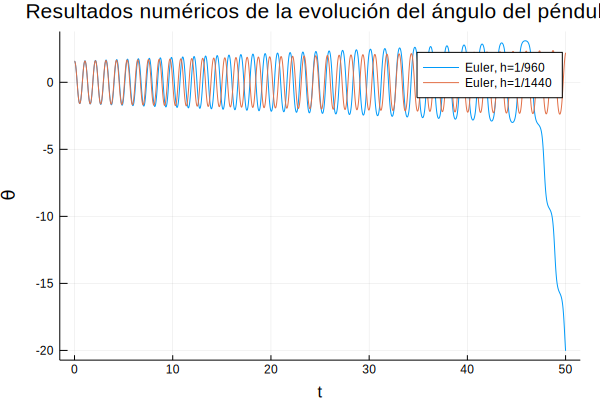

In [61]:
res = Euler(u0,t0,T,n,f,p,2);
res2 = Euler(u0,t0,T,n,f,p,3);

tt = res[:,1]
thetas = res[:,2]
omegas = res[:,3]

tt2 = res2[:,1]
thetas2 = res2[:,2]
omegas2 = res2[:,3]
plot(tt,thetas,title="Resultados numéricos de la evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label=string("Euler, h=1/",480*2))
plot!(tt2,thetas2, label=string("Euler, h=1/",480*3))

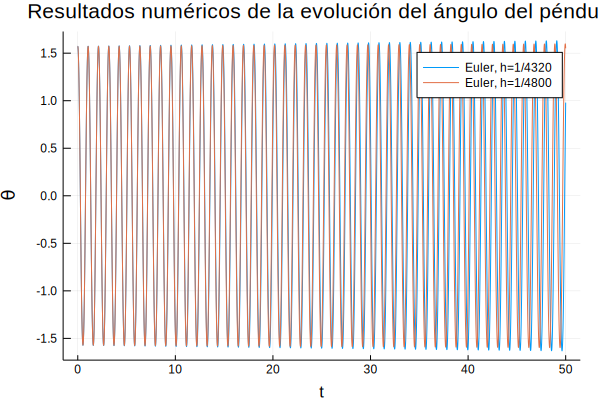

In [62]:
res = Euler(u0,t0,T,n,f,p,9);
res2 = Euler(u0,t0,T,n,f,p,10);

tt = res[:,1]
thetas = res[:,2]
omegas = res[:,3]

tt2 = res2[:,1]
thetas2 = res2[:,2]
omegas2 = res2[:,3]
plot(tt,thetas,title="Resultados numéricos de la evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label=string("Euler, h=1/",480*9))
plot!(tt2,thetas2, label=string("Euler, h=1/",480*10))

- **Comentar el proceso de obtención de aproximaciones cada vez más precisas de los valores de los ángulos.**

> **Comentarios**
>
> Se puede observar que la diferencia entre los resultados obtenidos va disminuandose para longitudes de paso mas pequeñas. Eso es debido al hecho que el error del metodo de Euler esta proporcional a la longitud de los pasos. Por lo cual, mas pequeña esta la longitud de paso, menor sera el error cometido durante el proceso de estimacion de la funcion y su derivada.

### 3.7- Ejercicio

 - **Utilizar los resultados finales para guardar en un fichero los datos de $\theta$ para $n=24001$ valores de $t$ uniformemente espaciados en el intervalo $[0,50]$. Realizar, haciendo uso de dicho fichero, la simulación animada del péndulo inmerso en aire. ¿Parece ahora realista dicha simulación?** 


In [63]:
data2="./angulos_pendulo_3.txt"
f2=open(data2,"w");
writedlm(f2,thetas2)
close(f2);

Ejecutar el codigo JavaScripts: <a href="http://www.ehu.eus/ccwmuura/irakaskuntza/sinum/animaciones/pendulo/pendulo_desde_fichero.html">Fichero html</a>

- **¿Se obtiene ahora una simulación realista?**

> **Respuesta**
> 
> Si, la simulacion esta realista. El movimiento del pendulum no va creciendo en amplitud y se mantiene centrado en su punto de equilibrium. Tambien parece que el movimiento va disminuando en amplitud poco a poco, como se espere de un pendulum correctamente equilibrado.

<a href="#top">Back to the top</a>

### Valoración

_Incluir aquí los comentarios de valoración de la tarea a entregar (dificultad, interés, etc, incluidas, si se quiere, sugerencias de mejora del ejercicio), así como una estimación del tiempo dedicado al trabajo de la semana (desglosado en el tiempo de estudio de material teórico, tiempo de dedicación a la participación activa o pasiva en los foros, tiempo de implementación y experimentación con los problemas prácticos planteados, y tiempo de preparación del documento jupyter final)._

>Dificultad de la tarea: **Mediana**
>
>    Interes: Me ha gustado mucho el ejercicio. Y tengo el sentimiento de haber aprendido mucho. Me han gustado mucho los ejemplos Lotka-Volterra y el pendulum. Y tambien me parece muy divertido programar en Julia. 
>
>    Estimacion del tiempo dedicado: estudio material teorico ($2h$), participacion en el foro ($1h$), implementacion y experimentacion con el problema practio planteado ($8h$), preparacion del documento jupyter ($1h$).
>